#### Module 8- Measures of Location and Spread
author: Radley Rigonan

This module is the first in a series of modules that explore data and statistical analysis.  In this case, we will be using DoseNet data to improve our understanding of statistical spread and location.

I will be using DoseNet data from the following link:
https://radwatch.berkeley.edu/sites/default/files/dosenet/etch.csv

In [2]:
%matplotlib inline
import csv
import io
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from datetime import datetime

url = 'https://radwatch.berkeley.edu/sites/default/files/dosenet/etch.csv'
response = urllib.request.urlopen(url)
reader = csv.reader(io.TextIOWrapper(response))  
timedata = []    
cpm = []
line = 0
for row in reader:
    if line != 0:
        timedata.append(datetime.fromtimestamp(float(row[2],)))
        cpm.append(float(row[6]))
    line += 1

Measures of spread quantify the range and distribution of a sample set of data.  Together with measures of central tendency, they provide numerical representation of a dataset.  The most common measures are range, interquartile range, variance (population and sample), and standard deviation.  These values are defined as:

RANGE: max(data) - min(data)

INTERQUARTILE RANGE: upper_quartile(data) - lower_quartile(data)

POP. VARIANCE = sum(data - mean(data))^2 / N

SAMPLE VARIANCE = sum(data - mean(data)^2 / (N - 1)

STANDARD DEVIATION = sqrt(variance(data))

In [3]:
cpm_range = max(cpm) - min(cpm)
print('the range of CPM is: %s \n' %cpm_range)


cpm_quartiles = np.percentile(cpm, [25, 50, 75])       
    # calculate 25th, 50th, and 75th percentiles (aka lower quartile, median, and upper quartile)
print('the lower quartile splits at CPM: %s\nthe second quartile splits at CPM: %s\nthe upper quartile splits at CPM: %s \n' 
      %(cpm_quartiles[0],cpm_quartiles[1],cpm_quartiles[2]))


cpm_quartrange = cpm_quartiles[2]-cpm_quartiles[0]
print('the interquartile range of CPM is: %s' %cpm_quartrange)

the range of CPM is: 5.8 

the lower quartile splits at CPM: 2.0
the second quartile splits at CPM: 2.4
the upper quartile splits at CPM: 3.0 

the interquartile range of CPM is: 1.0


In [4]:
cpm_mean = sum(cpm)/len(cpm)
cpm_pvariance1 = sum([(Xi-cpm_mean)**2 for Xi in cpm]) / len(cpm)
print('population variance of CPM from its definition is: %s' %cpm_pvariance1)


cpm_svariance1 = sum([(Xi-cpm_mean)**2 for Xi in cpm]) / (len(cpm)-1)
print('sample variance of CPM from its definition is: %s \n' %cpm_svariance1)


cpm_pvariance2 = np.var(cpm)
print('population variance of CPM from built-in function is: %s' %cpm_pvariance2)


cpm_svariance2 = np.var(cpm, ddof=1)
print('sample variance of CPM from built-in function is: %s' %cpm_svariance2)

population variance of CPM from its definition is: 0.5460456956078232
sample variance of CPM from its definition is: 0.5460535111100718 

population variance of CPM from built-in function is: 0.546045695608
sample variance of CPM from built-in function is: 0.54605351111


In [5]:
cpm_pstdev1 = cpm_pvariance1**0.5
cpm_sstdev1 = cpm_svariance1**0.5
print('population standard deviation from its definition is: %s\nsample standard deviation from its definition is %s \n' 
      %(cpm_pstdev1,cpm_sstdev1))


cpm_pstdev2 = np.std(cpm)
cpm_sstdev2 = np.std(cpm, ddof=1)
print('population standard deviation from built-in function is: %s\nsample standard deviation from built-in function is %s' 
      %(cpm_pstdev2,cpm_sstdev2))

population standard deviation from its definition is: 0.7389490480458197
sample standard deviation from its definition is 0.7389543362820681 

population standard deviation from built-in function is: 0.738949048046
sample standard deviation from built-in function is 0.738954336282


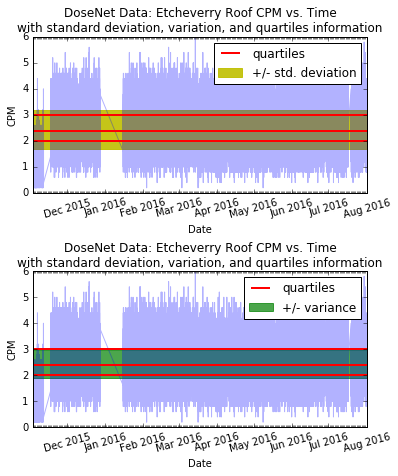

In [6]:
# Now we will plot the standard deviation and variation into two subplots:

# 1st step: plot the data:
fig = plt.figure(figsize=[6,7])     # I use a non-default figure size in order to prevent crowding/overlapping
ax1 = fig.add_subplot(211)          # 1st subplot with variable name ax1
ax1.plot(timedata,cpm,alpha=0.3)
ax1.plot([timedata[0],timedata[-1]],[cpm_quartiles[0],cpm_quartiles[0]], linewidth=2, color='r')
ax1.plot([timedata[0],timedata[-1]],[cpm_quartiles[1],cpm_quartiles[1]], linewidth=2, color='r')
ax1.plot([timedata[0],timedata[-1]],[cpm_quartiles[2],cpm_quartiles[2]], linewidth=2, color='r', label='quartiles')
ax1.axhspan(cpm_mean-cpm_pstdev1, cpm_mean+cpm_pstdev1, color='y', alpha=0.9, label='+/- std. deviation')
    # axhspan(a,b) plots a horizontal space from point y = a to y = b

# 2nd step: adjust axis, establish titles, labels, and legend:
plt.legend(loc='best')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())
plt.xticks(rotation=15)

plt.title('DoseNet Data: Etcheverry Roof CPM vs. Time\nwith standard deviation, variation, and quartiles information')
plt.ylabel('CPM')
plt.xlabel('Date')

# And repeat steps for 2nd subplot!
ax2 = fig.add_subplot(212)       # 2nd subplot with variable name ax2
ax2.plot(timedata,cpm,alpha=0.3)
ax2.plot([timedata[0],timedata[-1]],[cpm_quartiles[0],cpm_quartiles[0]], linewidth=2, color='r')
ax2.plot([timedata[0],timedata[-1]],[cpm_quartiles[1],cpm_quartiles[1]], linewidth=2, color='r')
ax2.plot([timedata[0],timedata[-1]],[cpm_quartiles[2],cpm_quartiles[2]], linewidth=2, color='r', label='quartiles')
ax2.axhspan(cpm_mean-cpm_pvariance1,cpm_mean+cpm_pvariance1, color ='g', alpha=0.7, label='+/- variance')

plt.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
plt.xticks(rotation=15)

plt.title('DoseNet Data: Etcheverry Roof CPM vs. Time\nwith standard deviation, variation, and quartiles information')
plt.ylabel('CPM')
plt.xlabel('Date')
fig.subplots_adjust(hspace=.5)  # add space between subplots for xlabels and title in order to prevent overlapping

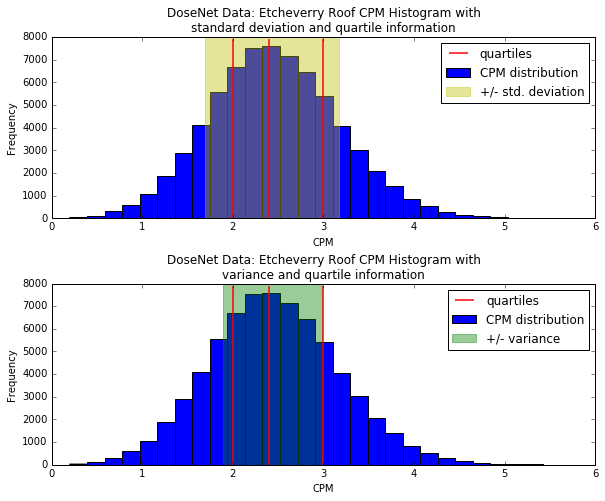

In [8]:
fig = plt.figure(figsize=[6,7])
ax1 = fig.add_subplot(211)
y,x, _ = plt.hist(cpm,bins=30, alpha=1, label='CPM distribution')
ax1.axvspan(cpm_mean-cpm_pstdev1, cpm_mean+cpm_pstdev1, color='y', alpha=0.4, label='+/- std. deviation')
ax1.plot([cpm_quartiles[0],cpm_quartiles[0]], [0,y.max()+250], alpha=0.75, linewidth=2, color='r')
ax1.plot([cpm_quartiles[1],cpm_quartiles[1]], [0,y.max()+250], alpha=0.75, linewidth=2, color='r')
ax1.plot([cpm_quartiles[2],cpm_quartiles[2]], [0,y.max()+250], alpha=0.75, linewidth=2, color='r', label='quartiles')

plt.legend(loc='best')
plt.title('DoseNet Data: Etcheverry Roof CPM Histogram with\nstandard deviation and quartile information')
plt.ylabel('Frequency')
plt.xlabel('CPM')
plt.tight_layout()

ax2=fig.add_subplot(212)
y,x, _ = plt.hist(cpm,bins=30, alpha=1, label='CPM distribution')
ax2.axvspan(cpm_mean-cpm_pvariance1,cpm_mean+cpm_pvariance1, color ='g', alpha=0.4, label='+/- variance')
ax2.plot([cpm_quartiles[0],cpm_quartiles[0]], [0,y.max()+250], alpha=0.75, linewidth=2, color='r')
ax2.plot([cpm_quartiles[1],cpm_quartiles[1]], [0,y.max()+250], alpha=0.75, linewidth=2, color='r')
ax2.plot([cpm_quartiles[2],cpm_quartiles[2]], [0,y.max()+250], alpha=0.75, linewidth=2, color='r', label='quartiles')

plt.legend(loc='best')
plt.title('DoseNet Data: Etcheverry Roof CPM Histogram with\nvariance and quartile information')
plt.ylabel('Frequency')
plt.xlabel('CPM')
plt.tight_layout()